<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-09-07 20:30:21--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.5’

m4_survey_data.sqli 100%[===================>]  34.98M  45.9MB/s    in 0.8s    

2024-09-07 20:30:23 (45.9 MB/s) - ‘m4_survey_data.sqlite.5’ saved [36679680/36679680]



Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd

## Demo: How to run an sql query


In [145]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [205]:
QUERY = """
SELECT *
FROM DatabaseWorkedWith
"""
df=pd.read_sql_query(QUERY,conn)
df['DatabaseWorkedWith'].value_counts()


MySQL                   5469
Microsoft SQL Server    4110
PostgreSQL              4097
SQLite                  3248
MongoDB                 3016
Redis                   2508
Elasticsearch           1954
Oracle                  1744
MariaDB                 1709
Firebase                1314
DynamoDB                 831
Other(s):                728
Cassandra                397
Couchbase                250
Name: DatabaseWorkedWith, dtype: int64

In [146]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [198]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [34]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

In [147]:
QUERY = """
SELECT *
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)

In [150]:
missing_data=df['ConvertedComp'].isnull()
df=df.dropna(subset=['ConvertedComp'], axis=0)

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.

In [151]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import numpy as np
import seaborn as sns
mpl.style.use('ggplot')

In [152]:
count, bin_edges = np.histogram(df['ConvertedComp'])
print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins


[9659  238  115  125   99  131   34   15   15  151]
[      0.  200000.  400000.  600000.  800000. 1000000. 1200000. 1400000.
 1600000. 1800000. 2000000.]


Text(0.5, 1.0, 'ConvertedComp')

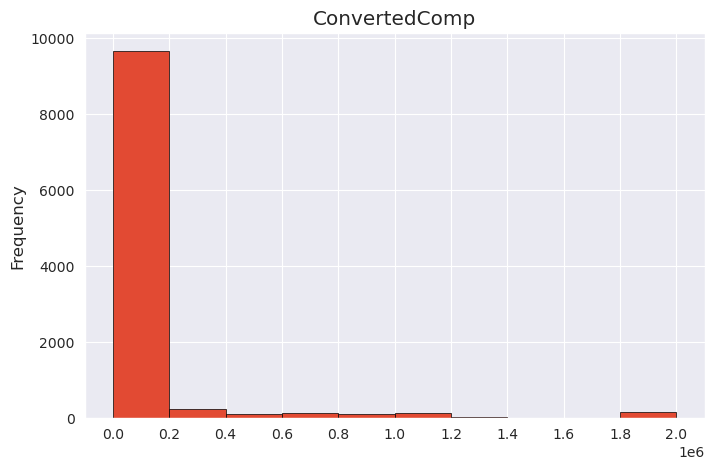

In [153]:
plot=sns.set_style("darkgrid")
df['ConvertedComp'].plot(kind="hist", edgecolor='black', xticks=bin_edges, figsize=(8,5))
plt.title("ConvertedComp")

### Box Plots


Plot a box plot of `Age.`


Text(0.5, 1.0, 'Box plot of Age Column')

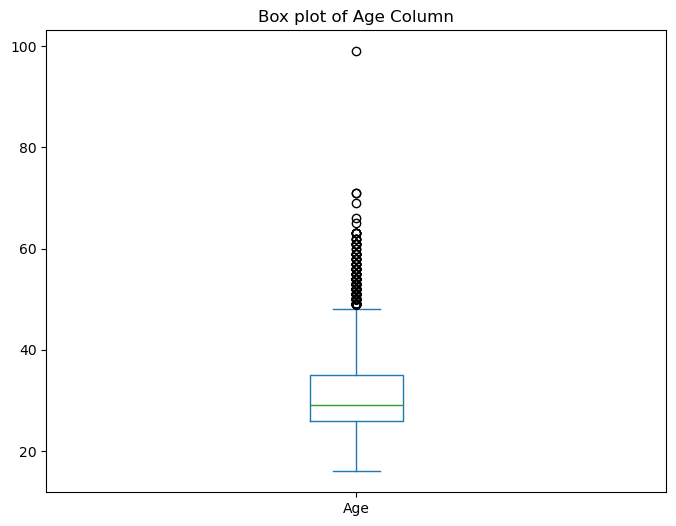

In [33]:
# your code goes here
df['Age'].plot(kind="box", figsize=(8,6))
plt.title('Box plot of Age Column')


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


In [154]:
# your code goes here
missing_data=df['WorkWeekHrs'].isnull()
missing_data.value_counts()
df=df.dropna(subset=['WorkWeekHrs'], axis=0)
df=df.dropna(subset=['Age'], axis=0)
missing_data.value_counts()

False    10538
True        44
Name: WorkWeekHrs, dtype: int64

In [155]:
df['Age'].astype("int")
df['WorkWeekHrs'].astype("int")
df_group_one= df[['Age', 'WorkWeekHrs']]
df_group_one

,Age,WorkWeekHrs
0,22.0,80.0
1,23.0,32.0
2,28.0,40.0
3,26.0,40.0
4,29.0,45.0
...,...,...
11392,32.0,56.0
11393,36.0,40.0
11394,25.0,40.0
11395,34.0,40.0


Text(0, 0.5, 'WorkWeekHrs')

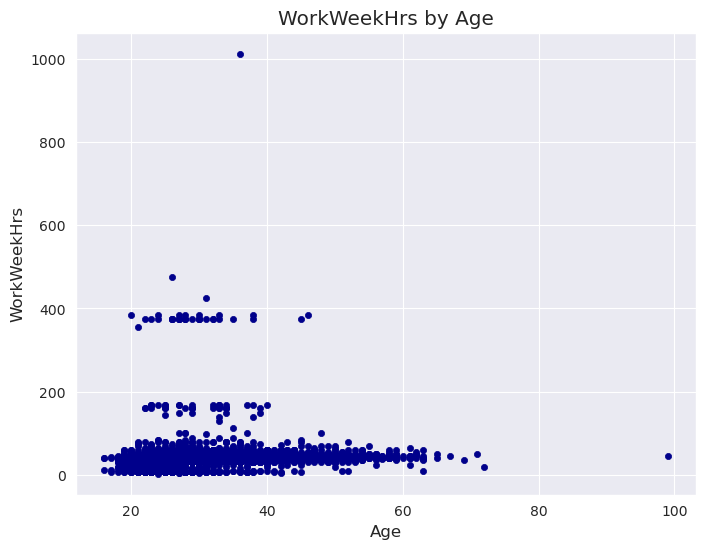

In [162]:
df_group_one.plot(kind='scatter', x='Age', y='WorkWeekHrs', figsize=(8, 6), color='darkblue')

plt.title('WorkWeekHrs by Age')
plt.xlabel('Age')
plt.ylabel('WorkWeekHrs')


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


In [71]:
# your code goes here
missing_data=df['WorkWeekHrs'].isnull()
df=df.dropna(subset=['WorkWeekHrs'], axis=0)
missing_data.value_counts()

False    11276
Name: WorkWeekHrs, dtype: int64

In [87]:
bubble_group=df[['WorkWeekHrs', 'CodeRevHrs']]

In [97]:
import seaborn as sns

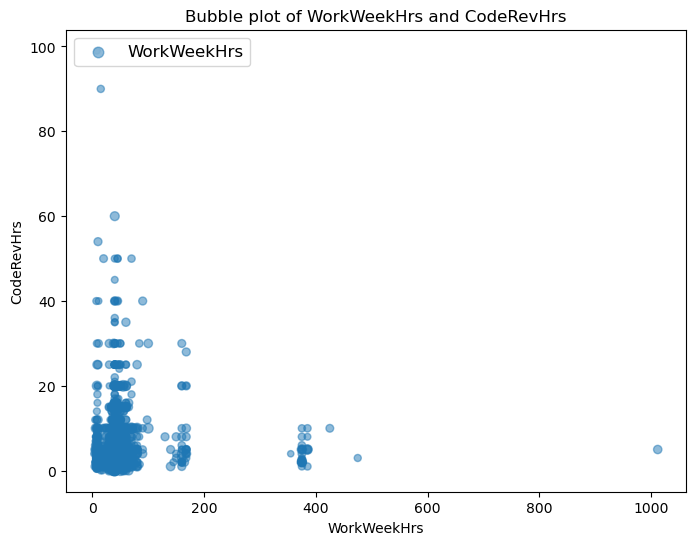

In [130]:
ax0 = bubble_group.plot(kind='scatter',
                    x='WorkWeekHrs',
                    y='CodeRevHrs',
                    figsize=(8, 6),
                    alpha=0.5,  # transparency
                    cmap='Blues',
                    s=df['Age']
                    )

ax0.set_ylabel('CodeRevHrs')
ax0.set_xlabel('WorkWeekHrs')
ax0.set_title('Bubble plot of WorkWeekHrs and CodeRevHrs')
ax0.legend(Hour_type, loc='upper left', fontsize='large')


#### Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [170]:
QUERY= """
SELECT *
FROM DatabaseDesireNextYear
"""

In [171]:
# your code goes here
df=pd.read_sql(QUERY,conn)

In [172]:
Top=df['DatabaseDesireNextYear'].value_counts()
Top

PostgreSQL              4328
MongoDB                 3649
Redis                   3331
MySQL                   3281
Elasticsearch           2856
Microsoft SQL Server    2706
SQLite                  2437
Firebase                1650
MariaDB                 1385
DynamoDB                1044
Cassandra               1003
Oracle                   870
Other(s):                645
Couchbase                390
Name: DatabaseDesireNextYear, dtype: int64

In [58]:
data=[[1,'PostgreSQL', 4328],[2,'MongoDB', 3649],[3,'Redis',3331],[4,'MySQL', 3281],[5,'Elasticsearch',2856]]
top_5=pd.DataFrame(data)
top_5.columns=['ID', 'DatabaseName', 'Total']
top_5['Total'].astype('int')

0    4328
1    3649
2    3331
3    3281
4    2856
Name: Total, dtype: int64

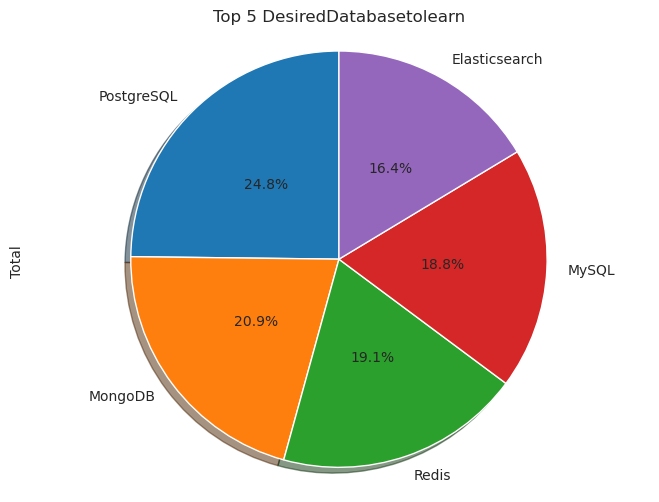

In [63]:
top_5['Total'].plot(kind='pie',
                                figsize=(8, 6),
                                autopct='%1.1f%%', 
                                startangle=90,    
                                shadow=True,       
                                labels=top_5['DatabaseName'],            
                                pctdistance=0.5,
                                subplots=True
                                )

    # scale the title up by 12% to match pctdistance
plt.title('Top 5 DesiredDatabasetolearn')
plt.axis('equal') 

    # show plot
plt.show()


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


In [101]:
# your code goes here
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age
FROM master
WHERE Age between 30 and 35
"""


In [102]:
df=pd.read_sql(QUERY,conn)

In [103]:
StackChart=df.groupby('Age').median()

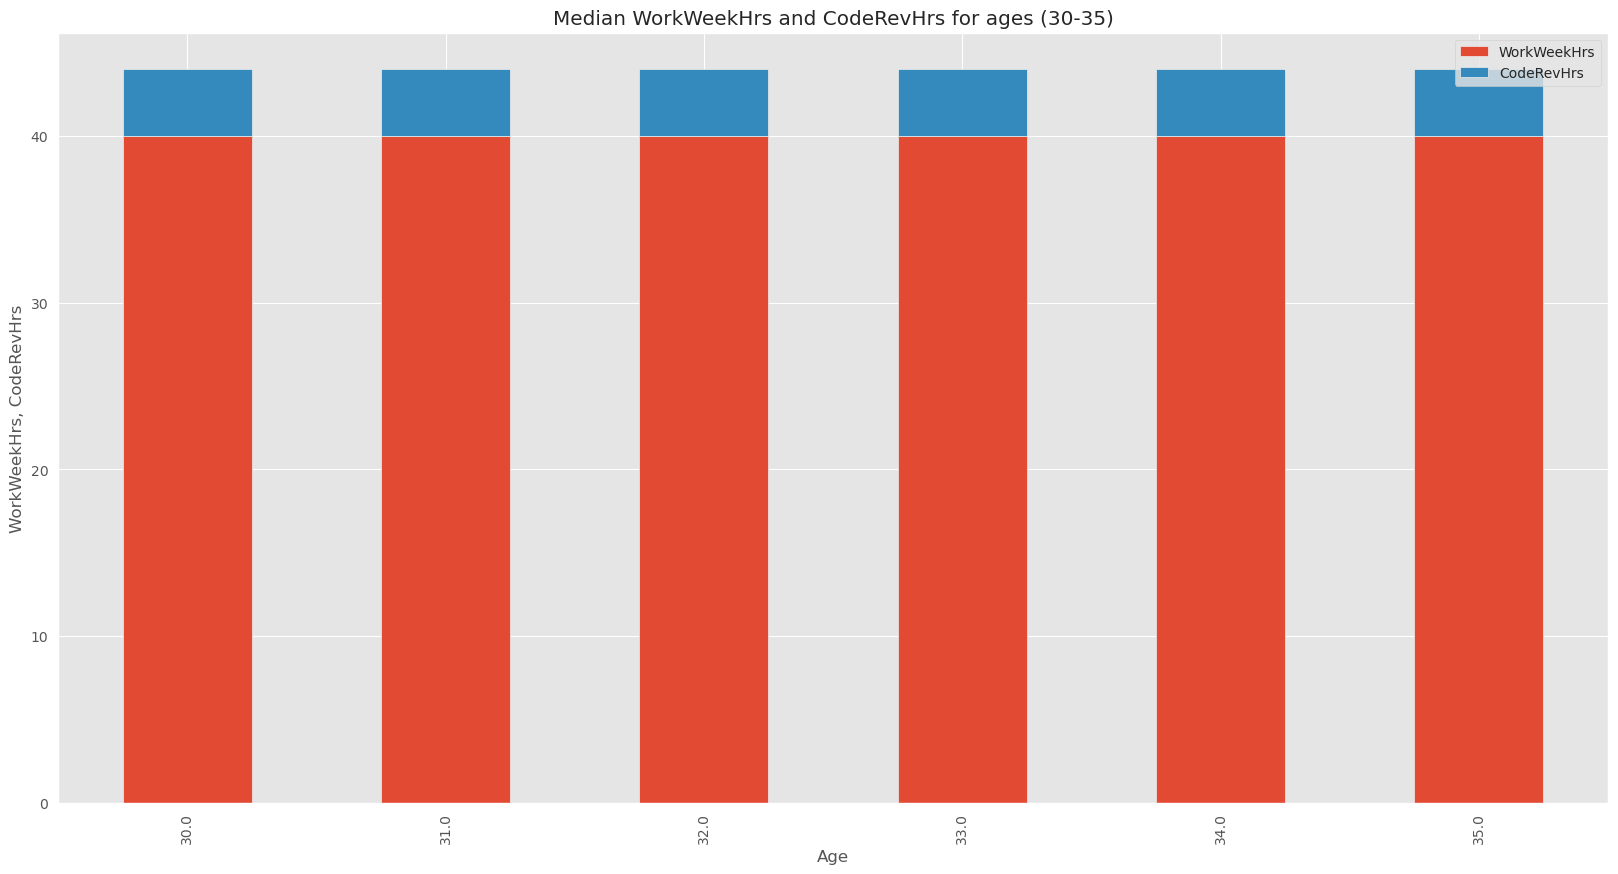

In [108]:
StackChart.plot(kind='bar',
             stacked=True,
             figsize=(20, 10))  # pass a tuple (x, y) size

plt.title('Median WorkWeekHrs and CodeRevHrs for ages (30-35)')
plt.ylabel('WorkWeekHrs, CodeRevHrs')
plt.xlabel('Age')

plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


In [109]:
# your code goes here
QUERY = """
SELECT ConvertedComp, Age
FROM master
WHERE Age between 45 and 60
"""


In [120]:
df=pd.read_sql(QUERY,conn)

In [126]:
LineChart=df.groupby('Age').median()

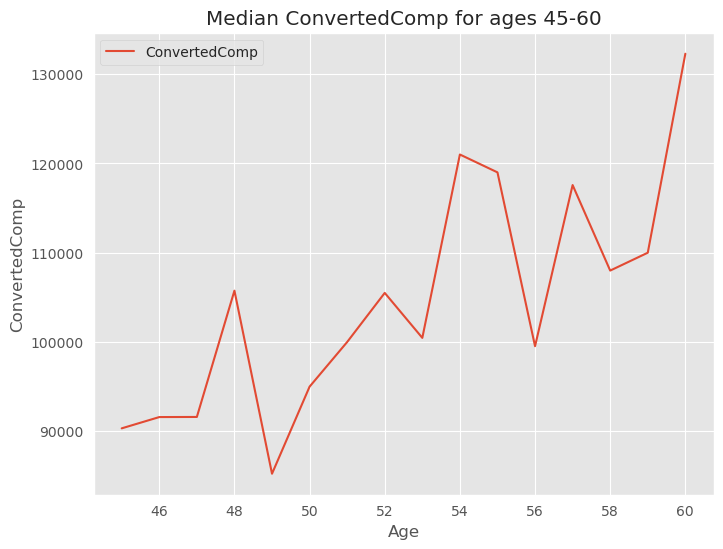

In [123]:
LineChart.plot(kind='line', figsize=(8,6))

plt.title('Median ConvertedComp for ages 45-60')
plt.ylabel('ConvertedComp')
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


In [136]:
# your code goes here
QUERY = """
SELECT MainBranch, COUNT(*) as MainBranch
FROM master
group by MainBranch
"""


In [137]:
df=pd.read_sql(QUERY,conn)

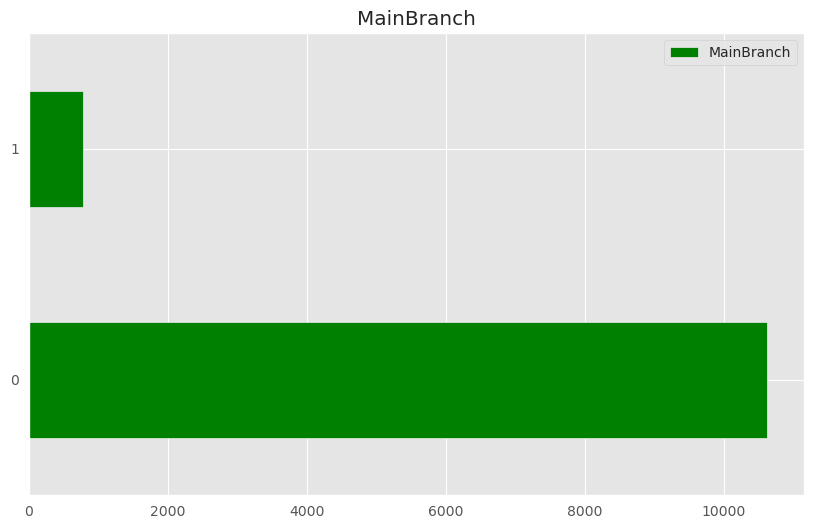

In [138]:
df.plot(kind='barh', figsize=(10, 6), color = 'green')

plt.title('MainBranch') 

plt.show()


Close the database connection.


In [ ]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
